In [3]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [4]:
first_year=1892
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [59]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')


In [60]:
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month

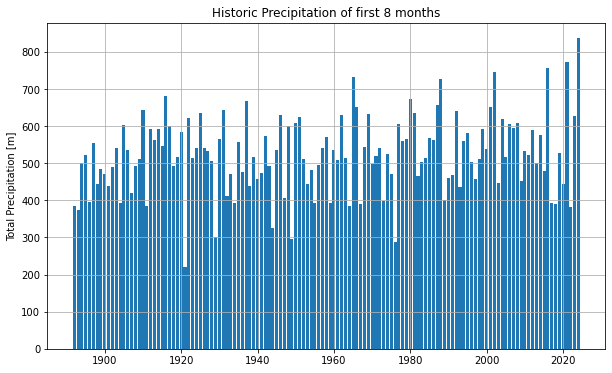

In [61]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()



plt.figure(figsize=(10, 6))
plt.bar(years, tp_first_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Precipitation [m]')
plt.title('Historic Precipitation of first 8 months')
plt.grid()
#z = np.polyfit(years, historic_precipitation, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()


In [62]:
extreme_events=tp_first_8_months[tp_first_8_months['PRECIP_QUANTITY']>500]
tp_first_8_months.shape

(133, 2)

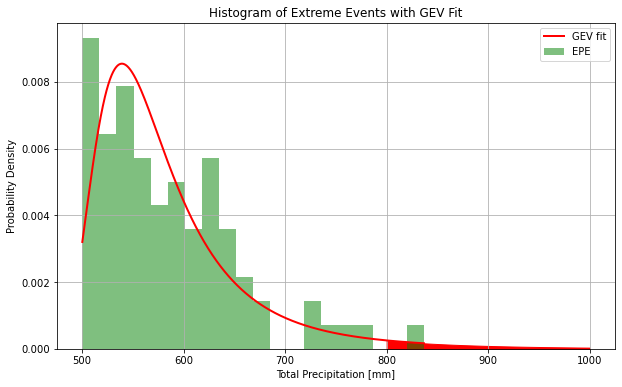

-0.23187964638670944 548.1202400794417 44.161354107627886


In [64]:
from scipy.stats import genextreme

# Fit the GEV distribution to the data
#check if it is a GEV or a GPD
shape, loc, scale = genextreme.fit(extreme_events['PRECIP_QUANTITY'])


plt.figure(figsize=(10, 6))
plt.hist(extreme_events['PRECIP_QUANTITY'], bins=20, density=True, alpha=0.5, color='g', label='EPE')

# Generate x values for the GEV curve
x = np.linspace(extreme_events['PRECIP_QUANTITY'].min(), extreme_events['PRECIP_QUANTITY'].max(), 1000)
# Plot the GEV curve
plt.plot(x, genextreme.pdf(x, shape, loc, scale), 'r-', lw=2, label='GEV fit')
#color the region below the GEV curve from 800 to 1000
x_fill = np.linspace(800, 1000, 1000)
plt.fill_between(x_fill, genextreme.pdf(x_fill, shape, loc, scale), color='red', alpha=1)



plt.ylabel('Probability Density')
plt.xlabel('Total Precipitation [mm]')
plt.title('Histogram of Extreme Events with GEV Fit')
plt.grid()
plt.legend()
plt.show()
print(shape, loc, scale)    

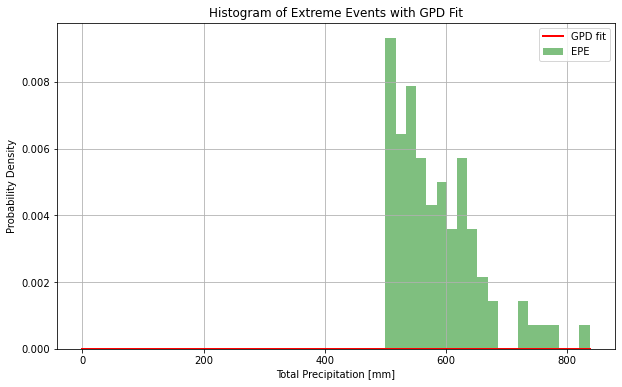

In [67]:
#fit the data of the extreme data to a GPD distribution
from scipy.stats import genpareto

# Fit the GPD distribution to the data
shape, loc, scale = genpareto.fit(extreme_events['PRECIP_QUANTITY'],floc=800)

plt.figure(figsize=(10, 6))
plt.hist(extreme_events['PRECIP_QUANTITY'], bins=20, density=True, alpha=0.5, color='g', label='EPE')

# Generate x values for the GPD curve
x = np.linspace(0, extreme_events['PRECIP_QUANTITY'].max(), 1000)
# Plot the GPD curve
plt.plot(x, genpareto.pdf(x, shape, loc, scale), 'r-', lw=2, label='GPD fit')

plt.ylabel('Probability Density')
plt.xlabel('Total Precipitation [mm]')
plt.title('Histogram of Extreme Events with GPD Fit')
plt.grid()
plt.legend()


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Create data for the plot
time = np.linspace(0, 150, 400)  # Time axis (x-axis)
years = np.linspace(1892, 2024)  # More years, so the curves overlap (Y-axis)

# Create Gaussian-like curves
curves = np.array([np.exp(-(time - (year - 2025) * 10)**2 / 100) for year in years])

# Normalize the curves for color mapping
norm_curves = (curves - np.min(curves)) / (np.max(curves) - np.min(curves))

# Create the figure
plt.figure(figsize=(20, 12))

# Use a lighter colormap ("Blues") and adjust transparency (alpha)
colors = ["#cce7ff", "#6699ff", "#0044cc", "#001f66"]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors)

# Plot each curve, colored by its "height" with lighter, transparent colors
for i, jahr in enumerate(years):
    plt.hist(df[df['year']=='jahr']['PRECIP_QUANTITY'], bins=30, density=True, alpha=0.1, color='b', label='1950')  # Plot the curve outline
    plt.fill_between(time, jahr, jahr + norm_curves[i] * 1.5, color=cmap(norm_curves[i]), alpha=0.7)  # Lighter color with alpha=0.3

# Add labels
plt.title('PDF of daily precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Year')

# Add a color bar to indicate intensity (height)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(curves), vmax=np.max(curves)))
sm.set_array([])  # For compatibility with color bar
plt.colorbar(sm, label='Height (Flux / Density)')

# Display the plot
plt.show()


NameError: name 'LinearSegmentedColormap' is not defined

<Figure size 1440x864 with 0 Axes>

In [10]:
#calculate the integral of the GEV curve from 800    
from scipy.integrate import quad
integral, error = quad(genextreme.pdf, 836, 100000, args=(shape, loc, scale))
integral*83/133  #multiplied by the total area of the histogram


0.011650264822240932

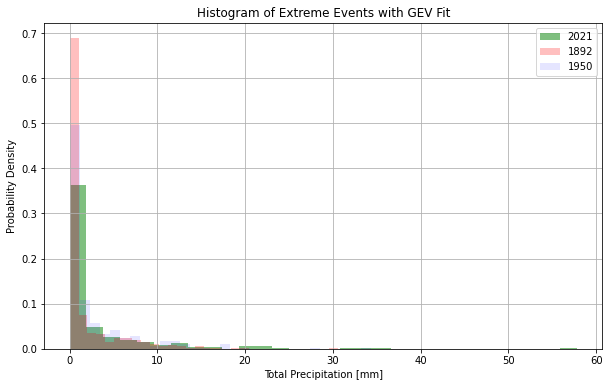

-1.6081118808323045 2.320315307864644e-20 5.302363191478424e-20


In [11]:
# Fit the GEV distribution to the data
shape_day, loc_day, scale_day = genextreme.fit(df[df['year']=='2021']['PRECIP_QUANTITY'])


plt.figure(figsize=(10, 6))
plt.hist(df[df['year']=='2021']['PRECIP_QUANTITY'], bins=30, density=True, alpha=0.5, color='g', label= '2021')
plt.hist(df[df['year']=='1892']['PRECIP_QUANTITY'], bins=30, density=True, alpha=0.25, color='r', label='1892')
plt.hist(df[df['year']=='1950']['PRECIP_QUANTITY'], bins=30, density=True, alpha=0.1, color='b', label='1950')

# Generate x values for the GEV curve
x_day = np.linspace(df[df['year']=='2021']['PRECIP_QUANTITY'].min(), df[df['year']=='2021']['PRECIP_QUANTITY'].max(), 1000)
# Plot the GEV curve
#plt.plot(x, genextreme.pdf(x_day, shape_day, loc_day, scale_day), 'r-', lw=2, label='GEV fit')
#color the region below the GEV curve from 800 to 1000
#x_fill = np.linspace(800, 1000, 1000)
#plt.fill_between(x_fill, genextreme.pdf(x_fill, shape, loc, scale), color='red', alpha=1)



plt.ylabel('Probability Density')
plt.xlabel('Total Precipitation [mm]')
plt.title('Histogram of Extreme Events with GEV Fit')
plt.grid()
plt.legend()
plt.show()
print(shape_day, loc_day, scale_day)    

In [12]:
rainy_days = df[df['PRECIP_QUANTITY']>5]

In [34]:
rainy_days_8_months = rainy_days[rainy_days['month']<9].groupby('year')['PRECIP_QUANTITY'].count().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(years, rainy_days_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Rainy Days')
plt.title('Historic Rainy Days of first 8 months')
plt.grid()
#z = np.polyfit(years, rainy_days_8_months['PRECIP_QUANTITY'], 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

NameError: name 'rainy_days' is not defined

In [14]:
#WD50

In [15]:
threshold=tp_first_8_months['PRECIP_QUANTITY']*0.5

In [16]:
rainy_days_ranked=rainy_days.sort_values(by=['year','PRECIP_QUANTITY'],ascending=[True,False])

In [17]:
# Initialize the list to store the number of days needed per year to reach the threshold
wd50 = []


for this_year in years:
    this_year = int(this_year)
    i=f'{this_year}'
    cumsum = 0
    days_count = 0 
    for index, row in rainy_days_ranked[rainy_days_ranked['year'] == i].iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1 
        if cumsum > threshold[int(this_year) - first_year]:
        #if cumsum > 200:    
            wd50.append(days_count) 
            break

    
    # Debugging print statements
    #print(f"Year: {this_year}, Cumulative Sum: {cumsum}, Days Needed: {days_count}, Threshold: {threshold[this_year - first_year]}")

In [5]:
years

array([1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899., 1900.,
       1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909.,
       1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019.,

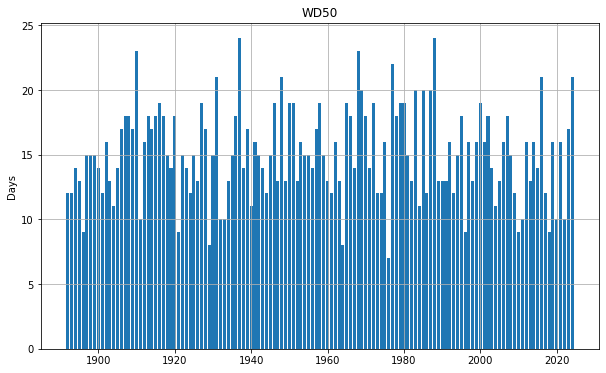

Moyenne de WD50 de 1892-1992: 15.8 et de 1992-2024: 14.344827586206897


In [18]:
plt.figure(figsize=(10, 6))
plt.bar(years, wd50, label='Total Precipitation')
plt.ylabel('Days')
plt.title('WD50')
plt.grid()
#z = np.polyfit(years, wd50, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

print(f'Moyenne de WD50 de 1892-1992: {np.mean(wd50[58:103])} et de 1992-2024: {np.mean(wd50[104:])}')